# Lab 4 - Linear models

We focus on models in the form 

$$ y ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

or in generalized form (generalized linear models)

$$ f(y) ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

where $f(y)$ is a link function, for example - logit.


In [11]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [12]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [13]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 1. Prior predictive checks

1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors
4. Check if observed data is possible to obtain using priors.

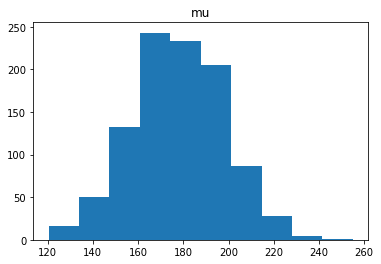

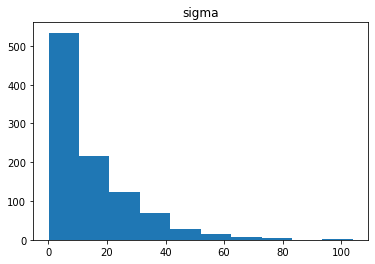

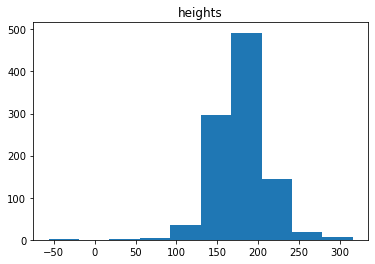

In [14]:
# print(dir(sim.generated_quantities))
# print(dir(sim.stan_variables))
# print(dir(sim))

# PLOTTING HISTOGRAMS
plt.hist(sim.stan_variable('mu'))
plt.title('mu')
plt.show()
plt.hist(sim.stan_variable('sigma'))
plt.title('sigma')
plt.show()
plt.hist(sim.stan_variable('heights'))
plt.title('heights')
plt.show()

C:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


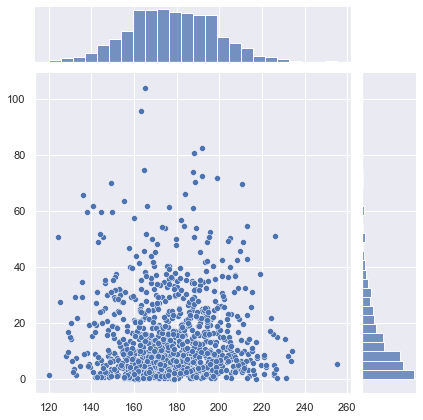

In [15]:
#JOINT DISTRIBIUTION
sns.set()
sns.jointplot(sim.stan_variable('mu'), sim.stan_variable('sigma'))
plt.show()

In [16]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [17]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)
dict(N=len(d), heights=d.height.values)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


{'N': 352,
 'heights': array([151.765 , 139.7   , 136.525 , 156.845 , 145.415 , 163.83  ,
        149.225 , 168.91  , 147.955 , 165.1   , 154.305 , 151.13  ,
        144.78  , 149.9   , 150.495 , 163.195 , 157.48  , 143.9418,
        161.29  , 156.21  , 146.4   , 148.59  , 147.32  , 147.955 ,
        161.925 , 146.05  , 146.05  , 152.7048, 142.875 , 142.875 ,
        147.955 , 160.655 , 151.765 , 162.8648, 171.45  , 147.32  ,
        147.955 , 154.305 , 143.51  , 146.7   , 157.48  , 165.735 ,
        152.4   , 141.605 , 158.8   , 155.575 , 164.465 , 151.765 ,
        161.29  , 154.305 , 145.415 , 145.415 , 152.4   , 163.83  ,
        144.145 , 153.67  , 142.875 , 167.005 , 158.4198, 165.735 ,
        149.86  , 154.94  , 160.9598, 161.925 , 147.955 , 159.385 ,
        148.59  , 136.525 , 158.115 , 144.78  , 156.845 , 179.07  ,
        170.18  , 146.05  , 147.32  , 162.56  , 152.4   , 160.02  ,
        149.86  , 142.875 , 167.005 , 159.385 , 154.94  , 162.56  ,
        152.4   , 170.18  

#### Task 2. Model fit and evaluation

1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



C:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


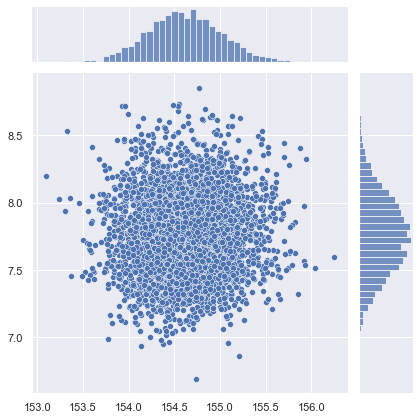

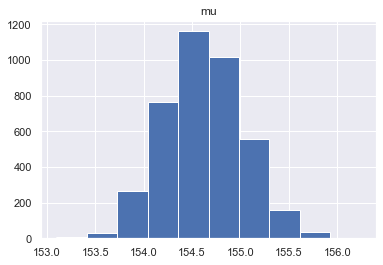

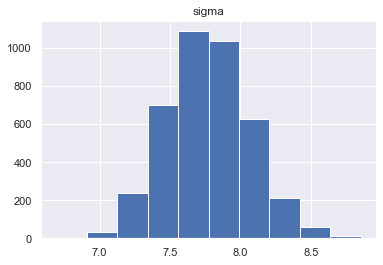

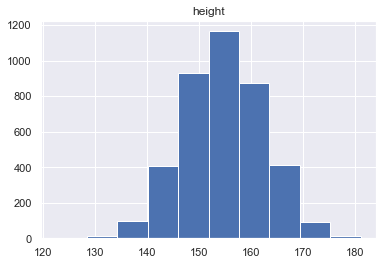

In [18]:
#JOINT DISTRIBIUTION
sns.set()
sns.jointplot(fit.stan_variable('mu'), fit.stan_variable('sigma'))
plt.show()


# PLOTTING HISTOGRAM
plt.hist(fit.stan_variable('mu'))
plt.title('mu')
plt.show()
plt.hist(fit.stan_variable('sigma'))
plt.title('sigma')
plt.show()
plt.hist(fit.stan_variable('height'))
plt.title('height')
plt.show()


## QUALITY EVALUATION

### Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [19]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')

d = d.assign(c_weight = d.weight / d.weight.mean())
d

R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 4. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

     lp__  accept_stat__    alpha       beta      sigma  height[1]  height[2]  \
0     0.0            0.0  232.163   7.771810  23.208300        NaN        NaN   
1     0.0            0.0  154.022  -0.067795   0.086958        NaN        NaN   
2     0.0            0.0  169.461 -11.386400  20.358900        NaN        NaN   
3     0.0            0.0  158.357  -2.544520   6.415610        NaN        NaN   
4     0.0            0.0  158.131  16.710200   9.955320        NaN        NaN   
..    ...            ...      ...        ...        ...        ...        ...   
995   0.0            0.0  161.753  12.613000   6.017940        NaN        NaN   
996   0.0            0.0  196.362  12.233800  10.413300        NaN        NaN   
997   0.0            0.0  172.792  -2.720510  76.805200        NaN        NaN   
998   0.0            0.0  126.115   9.871600  23.204300        NaN        NaN   
999   0.0            0.0  203.609  -5.146610  12.390200        NaN        NaN   

     height[3]  height[4]  

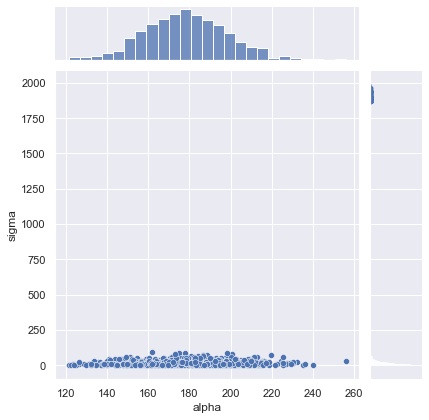

In [20]:

data = sim.draws_pd()
print(data)
sns.jointplot(data = data, x = "alpha", y = "sigma")

x = np.linspace(1, 10, 1000)
def fx(x):
    a = sim.stan_variable('alpha')
    b = sim.stan_variable('beta')
    y = np.matrix(b) * x.T + np.matrix(a)
    # print(y[:5])
    return y.T
plt.plot(x, fx(np.matrix(x)))
plt.show()

### Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [21]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [22]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 5. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

     lp__  accept_stat__    alpha      beta      sigma  height[1]  height[2]  \
0     0.0            0.0  232.163  2.175330  23.208300    236.627    201.451   
1     0.0            0.0  154.022  0.993243   0.086958    154.813    154.788   
2     0.0            0.0  169.461  0.320255  20.358900    198.520    165.854   
3     0.0            0.0  158.357  0.775342   6.415610    167.419    154.671   
4     0.0            0.0  158.131  5.317560   9.955320    135.817    155.993   
..    ...            ...      ...       ...        ...        ...        ...   
995   0.0            0.0  161.753  3.529990   6.017940    170.128    154.637   
996   0.0            0.0  196.362  3.398650  10.413300    205.690    205.249   
997   0.0            0.0  172.792  0.761815  76.805200    135.902    269.457   
998   0.0            0.0  126.115  2.683600  23.204300    148.703    133.587   
999   0.0            0.0  203.609  0.597703  12.390200    199.308    194.399   

     height[3]  height[4]  height[5]  .

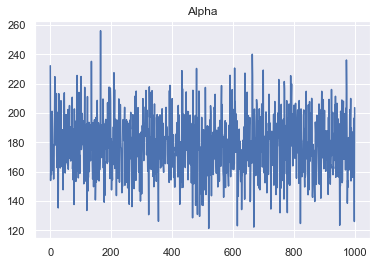

Text(0.5, 1.0, 'Beta')

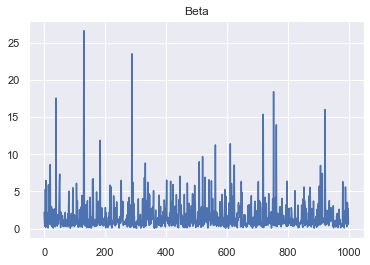

In [28]:
data = sim.draws_pd()
print(data)
plt.plot(data['alpha'])
plt.title('Alpha')
plt.show()
plt.plot(data['beta'])
plt.title('Beta')

## Cannot find anything about !Knug peoples' height, but height above 240 cm might be questionable.

### Fitting data


In [29]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


#### Task 6. Preparing data for fit
1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe

In [31]:
data_fit = {
    "N": 50, 
    "weight": d['weight'][0:50],
    "heights": d['height'][0:50]
}

fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


#### Task 7. Evaluating model

1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -109.899       0.998539    0.104787          5.0          31.0   
1    -111.450       0.811565    0.104787          5.0          31.0   
2    -109.576       0.948816    0.104787          5.0          31.0   
3    -110.495       0.770003    0.104787          3.0          15.0   
4    -109.910       0.971714    0.104787          4.0          19.0   
...       ...            ...         ...          ...           ...   
3995 -108.587       0.996287    0.114474          2.0           7.0   
3996 -108.560       0.999770    0.114474          5.0          31.0   
3997 -109.270       0.832161    0.114474          4.0          23.0   
3998 -108.814       0.991084    0.114474          4.0          19.0   
3999 -108.586       0.999417    0.114474          4.0          31.0   

      divergent__  energy__    alpha      beta    sigma  ...  height[41]  \
0             0.0   111.360  120.787  0.714021  5.91460  ...     166.47

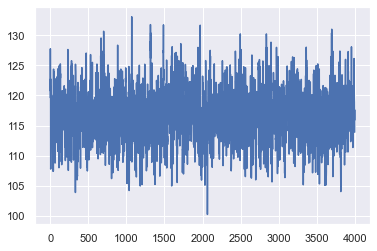

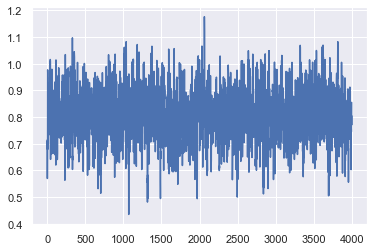

In [34]:
data = fit.draws_pd()
print(data)
plt.plot(data['alpha'])
plt.show()
plt.plot(data['beta'])
plt.show()